<a href="https://colab.research.google.com/github/gabriellfelipe7/Prediction_HousePrice/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction**

- Gabriel Felipe Machado de Oliveira
- Abril de 2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# **Importação da base de dados e análise de variáveis**

In [4]:
data = pd.read_csv('data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
data.shape

(4600, 18)

A base possui um total de 4600 linhas e 18 colunas. Não iremos utilizar todas as colunas, eventualmente excluiremos algumas utilizando de técnicas de tratamento.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Como nosso foco é utilizar o método de Regressão Linear para prevermos os valores do imóveis, snão faz sentido trabalharmos com variáveis não numéricas. Antes de apenas excluí-las, vamos nalisar seus valores unicos:

In [37]:
data['date'].value_counts()

2014-06-23 00:00:00    142
2014-06-25 00:00:00    131
2014-06-26 00:00:00    131
2014-07-08 00:00:00    127
2014-07-09 00:00:00    121
                      ... 
2014-06-07 00:00:00      4
2014-07-06 00:00:00      3
2014-07-04 00:00:00      2
2014-05-11 00:00:00      2
2014-05-17 00:00:00      1
Name: date, Length: 70, dtype: int64

In [38]:
data['street'].value_counts()

2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: street, Length: 4525, dtype: int64

In [40]:
data['country'].value_counts()

USA    4600
Name: country, dtype: int64

Não percemos muita importância para nosa análise, especificamente, resta-nos excluírmos essas colunas.

In [43]:
data = data.drop(columns=['date', 'street', 'city', 'statezip', 'country'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 467.3 KB


Não há valores nulos a serem tratados, logo partiremos para o pre-processamento,

<Axes: >

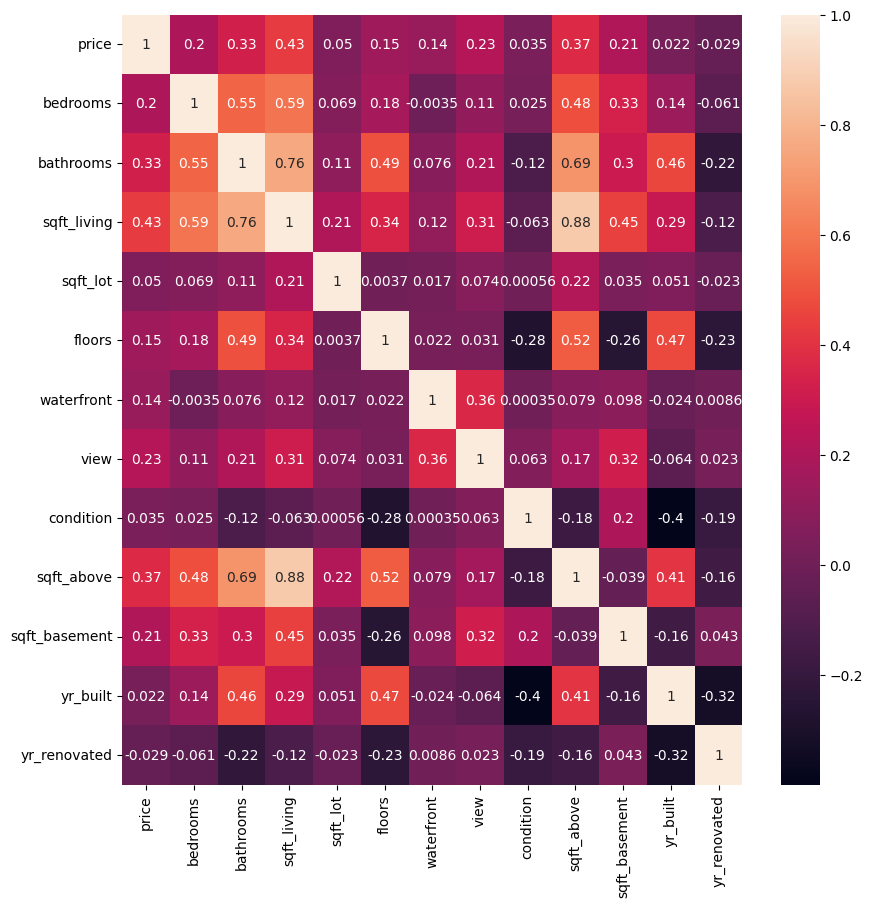

In [58]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(method = 'pearson'), annot = True)

<Figure size 1000x1000 with 0 Axes>

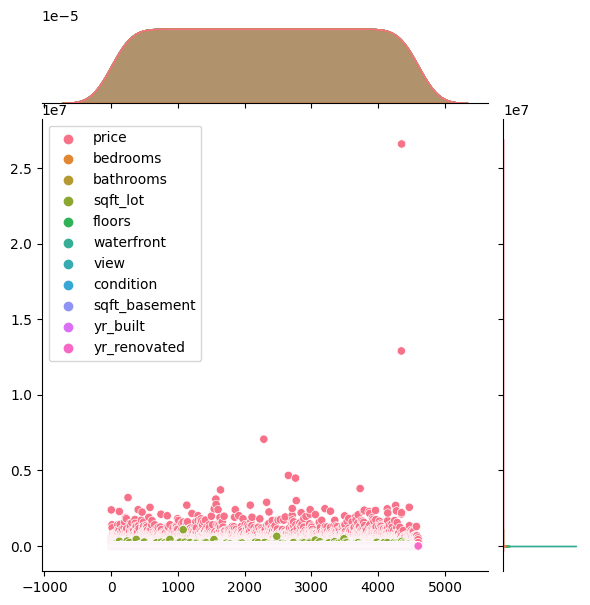

Por experiência, observamos que colunas preditoras que possuem correlações altas entre si afetam nossa predição, dessa forma, a melhor estratégia seria excluir colunas que causam esse efeito e possuem baixa correlação com a variável resposta.

In [60]:
data = data.drop(columns = ['sqft_above', 'sqft_living'])

<Axes: >

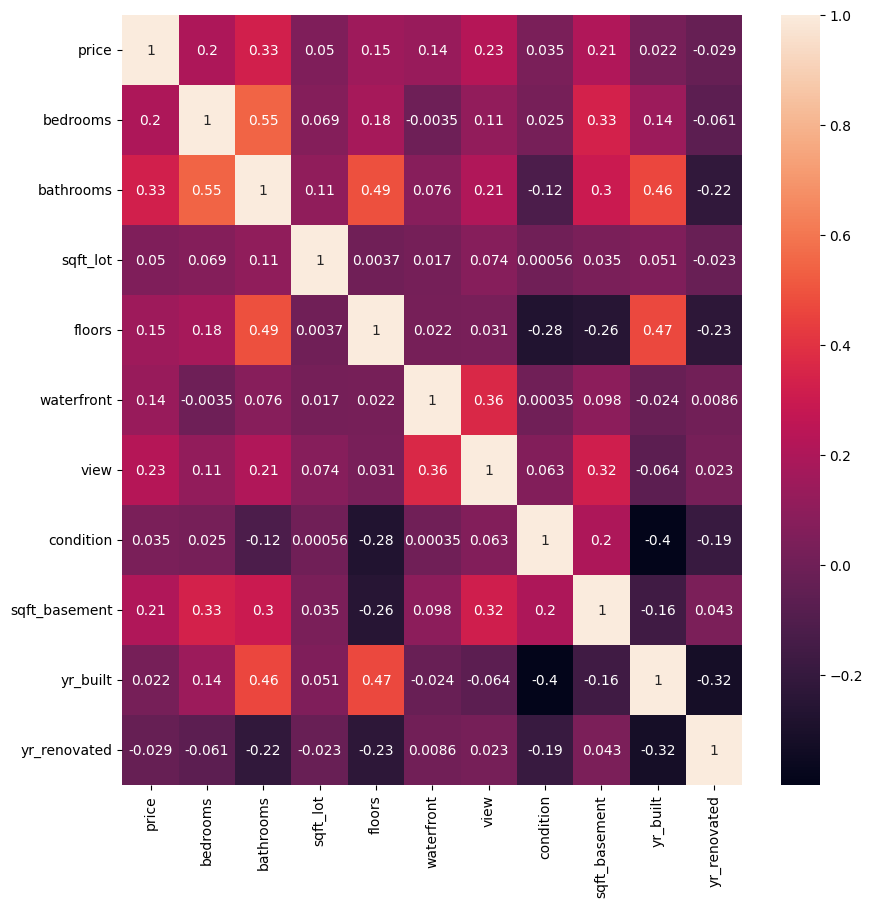

In [61]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(method = 'pearson'), annot = True)

In [62]:
data.shape

(4600, 11)

De 18 colunas fomos para 11 apenas com essa análise inicial. Agora, vamos partir para análise das distribuições de cada variável.